In [35]:
# Dependencies and Setup
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from pprint import pprint
from scipy import stats
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')

# Study data file
Indicators_path = "Indictors.csv"

Indicators_df = pd.read_csv(Indicators_path)

In [36]:
Indicators_df.head(2)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN


In [79]:
age_df = Indicators_df.loc[Indicators_df["Group"] == "By Age"]
age_df['Subgroup'].value_counts()

70 - 79 years         129
18 - 29 years         129
30 - 39 years         129
50 - 59 years         129
60 - 69 years         129
80 years and above    129
40 - 49 years         129
Name: Subgroup, dtype: int64

In [81]:
year2020_age_df = age_df.loc[age_df["Time Period Start Date"].str.contains("2020")]
year2020_age_df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN
5,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,18.4,17.0,19.7,17.0 - 19.7,NaN


In [42]:
Indicators_df.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range'],
      dtype='object')

In [39]:
Indicators_df['Indicator'].count()

8604

In [47]:
Indicators_df['Phase'].value_counts()

1                      2520
3.2                    1404
3.1                    1296
3 (Jan 6 � Mar 29)     1260
2                      1050
3 (Oct 28 � Dec 21)     840
-1                      234
Name: Phase, dtype: int64

In [43]:
Indicators_df['State'].value_counts()

United States           2637
Wisconsin                117
Nevada                   117
Vermont                  117
Hawaii                   117
Idaho                    117
Maine                    117
Ohio                     117
Wyoming                  117
Delaware                 117
Texas                    117
Washington               117
Arizona                  117
North Dakota             117
Alabama                  117
Illinois                 117
Arkansas                 117
New Jersey               117
Maryland                 117
Indiana                  117
District of Columbia     117
Virginia                 117
Montana                  117
Iowa                     117
Florida                  117
Pennsylvania             117
Kansas                   117
Connecticut              117
Oregon                   117
Michigan                 117
Missouri                 117
West Virginia            117
Rhode Island             117
Utah                     117
Tennessee     

In [46]:
Indicators_df['Time Period Start Date'].value_counts()

09/29/2021    234
09/15/2021    234
08/04/2021    234
09/01/2021    234
08/18/2021    234
07/21/2021    234
04/14/2021    216
05/12/2021    216
04/28/2021    216
06/09/2021    216
06/23/2021    216
05/26/2021    216
07/09/2020    210
12/09/2020    210
05/07/2020    210
02/17/2021    210
05/28/2020    210
11/11/2020    210
09/16/2020    210
03/17/2021    210
09/30/2020    210
01/06/2021    210
05/21/2020    210
05/14/2020    210
06/25/2020    210
11/25/2020    210
06/04/2020    210
02/03/2021    210
06/11/2020    210
10/14/2020    210
07/02/2020    210
06/18/2020    210
03/03/2021    210
04/23/2020    210
01/20/2021    210
08/19/2020    210
07/16/2020    210
09/02/2020    210
10/28/2020    210
07/06/2021     63
03/30/2021     57
12/22/2020     57
07/22/2020     57
Name: Time Period Start Date, dtype: int64

In [45]:
Indicators_df['Time Period'].value_counts()

1     444
39    234
38    234
35    234
37    234
34    234
36    234
33    216
30    216
28    216
32    216
29    216
31    216
7     210
15    210
14    210
23    210
6     210
21    210
13    210
5     210
22    210
8     210
20    210
12    210
16    210
27    210
19    210
11    210
3     210
26    210
18    210
10    210
2     210
25    210
17    210
9     210
24    210
4     210
Name: Time Period, dtype: int64

In [48]:
Indicators_df.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range'],
      dtype='object')

In [72]:
df = Indicators_df.loc[Indicators_df['State'] == 'United States', 
            ['Indicator', 'Phase', 'Time Period Start Date', 'Time Period End Date', 'Value']]

df.head(2)

,Indicator,Phase,Time Period Start Date,Time Period End Date,Value
0,Symptoms of Depressive Disorder,1,04/23/2020,05/05/2020,23.5
1,Symptoms of Depressive Disorder,1,04/23/2020,05/05/2020,32.7


In [73]:
df["Phase"].value_counts()

1                      684
3.2                    486
3.1                    378
3 (Jan 6 � Mar 29)     342
2                      285
-1                     234
3 (Oct 28 � Dec 21)    228
Name: Phase, dtype: int64

In [74]:
df.dtypes

Indicator                  object
Phase                      object
Time Period Start Date     object
Time Period End Date       object
Value                     float64
dtype: object

In [76]:
year2020_df = df.loc[df['Time Period Start Date'].str.contains("2020")]
year2020_df.shape

(1311, 5)

In [77]:
year2020_df['Time Period Start Date'].value_counts()

08/19/2020    57
09/16/2020    57
07/22/2020    57
09/30/2020    57
12/22/2020    57
07/09/2020    57
10/28/2020    57
06/18/2020    57
12/09/2020    57
07/02/2020    57
10/14/2020    57
11/11/2020    57
07/16/2020    57
06/11/2020    57
06/04/2020    57
11/25/2020    57
06/25/2020    57
09/02/2020    57
05/28/2020    57
05/14/2020    57
05/21/2020    57
05/07/2020    57
04/23/2020    57
Name: Time Period Start Date, dtype: int64

In [67]:
year2020_df = df.loc[df['Time Period Start Date'].str.contains("04/23/2020")]
year2020_df.shape

(57, 5)

09/29/2021    81
Name: Time Period Start Date, dtype: int64

In [69]:
df.drop_duplicates(subset='Time Period Start Date')['Time Period Start Date']

0       04/23/2020
210     05/07/2020
420     05/14/2020
630     05/21/2020
840     05/28/2020
1050    06/04/2020
1260    06/11/2020
1470    06/18/2020
1680    06/25/2020
1890    07/02/2020
2100    07/09/2020
2310    07/16/2020
2520    07/22/2020
2539    08/19/2020
2787    09/02/2020
2997    09/16/2020
3207    09/30/2020
3417    10/14/2020
3627    10/28/2020
3837    11/11/2020
4047    11/25/2020
4257    12/09/2020
4467    12/22/2020
4486    01/06/2021
4734    01/20/2021
4944    02/03/2021
5154    02/17/2021
5364    03/03/2021
5574    03/17/2021
5784    03/30/2021
5803    04/14/2021
6057    04/28/2021
6273    05/12/2021
6489    05/26/2021
6705    06/09/2021
6921    06/23/2021
7137    07/06/2021
7158    07/21/2021
7434    08/04/2021
7668    08/18/2021
7902    09/01/2021
8136    09/15/2021
8370    09/29/2021
Name: Time Period Start Date, dtype: object

In [70]:
year2020_df = df.loc[df['Time Period Start Date'].str.contains("09/29/2021")]
year2020_df.shape

(81, 5)

In [66]:
year2020_df = df.loc[df['Time Period Start Date'].str.contains("2021")]
year2020_df.shape

(1326, 5)

In [56]:
df["Indicator"].value_counts()

Symptoms of Anxiety Disorder or Depressive Disorder    879
Symptoms of Anxiety Disorder                           879
Symptoms of Depressive Disorder                        879
Name: Indicator, dtype: int64

In [58]:
df.groupby('Time Period Start Date')["Indicator"].value_counts()

Time Period Start Date  Indicator                                          
01/06/2021              Symptoms of Anxiety Disorder                           19
                        Symptoms of Anxiety Disorder or Depressive Disorder    19
                        Symptoms of Depressive Disorder                        19
01/20/2021              Symptoms of Anxiety Disorder                           19
                        Symptoms of Anxiety Disorder or Depressive Disorder    19
                                                                               ..
12/09/2020              Symptoms of Anxiety Disorder or Depressive Disorder    19
                        Symptoms of Depressive Disorder                        19
12/22/2020              Symptoms of Anxiety Disorder                           19
                        Symptoms of Anxiety Disorder or Depressive Disorder    19
                        Symptoms of Depressive Disorder                        19
Name: Indicator, Lengt

/Users/tyannapleasant/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tyannapleasant/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


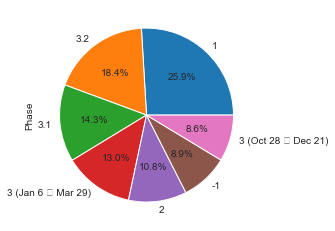

In [55]:
phase_df = df["Phase"].value_counts()

phase_df.plot(kind="pie", autopct="%1.1f%%")
plt.show()

In [6]:
headers=Indicators_df.loc[0]
Indicators_df=Indicators_df.drop(0)
Indicators_df.head(3)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN


In [ ]:
# bar chart 


# Set a title for the chart
plt.title('
plt.ylabel(')
plt.xlabel(')

plt.show()
plt.tight_layout()